## Elower grid error

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from exojax.spec.lbderror import single_tilde_line_strength_zeroth
from exojax.spec.lbderror import worst_tilde_line_strength_first
from exojax.spec.lbderror import worst_tilde_line_strength_second
from exojax.spec.lbderror import evaluate_trange

In [3]:
#N=10
N = 1000
Tarr = np.logspace(np.log10(100.), np.log10(5000.), N)
Twtarr = np.logspace(np.log10(100.), np.log10(2000.), N) + 0.0001
Tref = 400.
dE_0th = 1500.
dE_1st = dE_0th * 2
dE_2nd = dE_0th * 3

arr0 = []
arr1 = []
arr2 = []
trange0 = []
trange1 = []
trange2 = []
crit = 0.01

#Twtarr = np.array([1000.0])
for iT, Twt in enumerate(tqdm.tqdm(Twtarr)):
    x = single_tilde_line_strength_zeroth(1./Tarr, 1.0/Twt, 1.0/Tref, dE_0th)
    Tl, Tu = evaluate_trange(Tarr, x, crit, Twt)
    trange0.append([Tl, Twt, Tu])
    arr0.append(x)

    x = worst_tilde_line_strength_first(Tarr, Twt, Tref, dE_1st)
    Tl, Tu = evaluate_trange(Tarr, x, crit, Twt)
    trange1.append([Tl, Twt, Tu])
    arr1.append(x)

    x = worst_tilde_line_strength_second(Tarr, Twt, Tref, dE_2nd)
    Tl, Tu = evaluate_trange(Tarr, x, crit, Twt)
    trange2.append([Tl, Twt, Tu])
    arr2.append(x)
    
if True:
    arr0 = np.array(arr0).reshape(N, N)
    trange0 = np.array(trange0)
    arr1 = np.array(arr1).reshape(N, N)
    trange1 = np.array(trange1)
    arr2 = np.array(arr2).reshape(N, N)
    trange2 = np.array(trange2)


100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s]


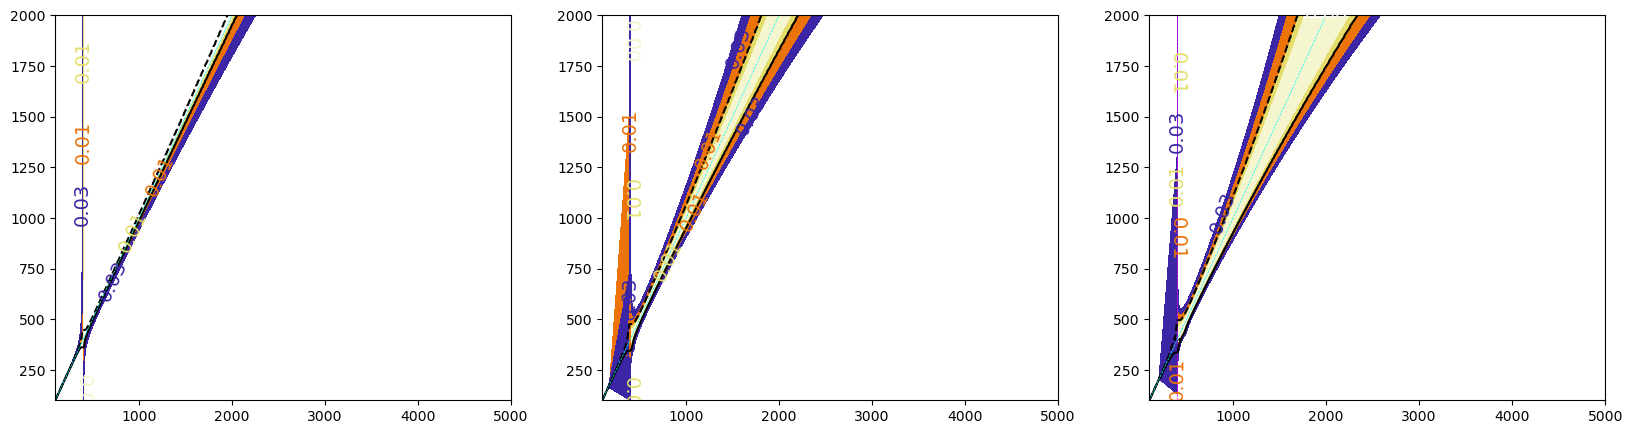

In [4]:
fig=plt.figure(figsize=(20,5))
ax = fig.add_subplot(131)
co=plt.contourf(Tarr, Twtarr, arr0, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)

plt.plot(trange0[:,0], trange0[:,1],color="black",ls="dashed")
plt.plot(trange0[:,2], trange0[:,1],color="black")
plt.plot(Twtarr,Twtarr,color="cyan",lw=0.5, ls="dashed")

ax = fig.add_subplot(132)
co=plt.contourf(Tarr, Twtarr, arr1, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)

plt.plot(trange1[:,0], trange1[:,1],color="black",ls="dashed")
plt.plot(trange1[:,2], trange1[:,1],color="black")
plt.plot(Twtarr,Twtarr,color="cyan",lw=0.5, ls="dashed")

ax = fig.add_subplot(133)
#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Twtarr, arr2, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(trange2[:,0], trange2[:,1],color="black",ls="dashed")
plt.plot(trange2[:,2], trange2[:,1],color="black")

plt.plot(Twtarr,Twtarr,color="cyan",lw=0.5, ls="dashed")
#plt.title("2nd, dE = "+str(dE_2nd)+"cm-1")
#plt.colorbar(co)
#plt.xscale("log")

In [11]:
Tl, Tu

(1992.1057806860729, 2007.76896591621)

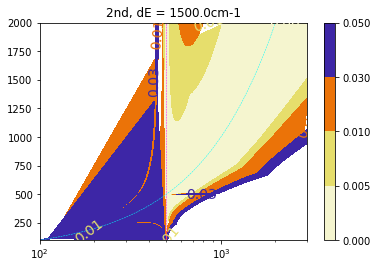

In [4]:

#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Twtarr, arr2, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Twtarr,Twtarr,color="cyan",lw=0.5, ls="dashed")
plt.title("2nd, dE = "+str(dE_2nd)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

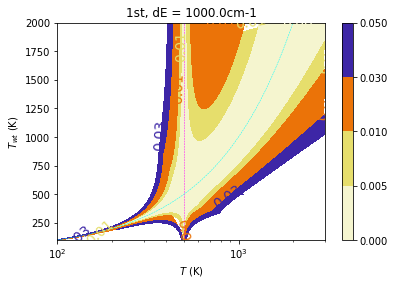

In [6]:

#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Twtarr, arr1, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Twtarr,Twtarr,color="cyan",lw=0.5, ls="dashed")
plt.title("1st, dE = "+str(dE_1st)+"cm-1")
plt.colorbar(co)
plt.ylabel("$T_{wt}$ (K)")
plt.xlabel("$T$ (K)")
plt.xscale("log")

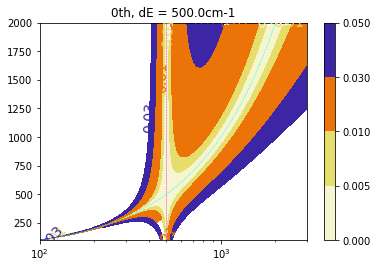

In [24]:
co=plt.contourf(Tarr, Twtarr, np.abs(arr0), levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Twtarr,Twtarr,color="cyan",lw=0.5, ls="dashed")
plt.title("0th, dE = "+str(dE_0th)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

In [13]:
N=1000
Twtarr = np.logspace(np.log10(500.1),np.log10(2000.1),N)
Tarr = np.logspace(np.log10(100.), np.log10(4000.), N)

Tref=500.
dE_2nd=1500.

arr2 = []
for Twt in tqdm.tqdm(Twtarr):
    x = worst_tilde_line_strength_second(Tarr, Twt, Tref, dE_2nd)
    arr2.append(x)

arr2 = np.array(arr2).reshape(N, N)


100%|██████████| 1000/1000 [01:44<00:00,  9.55it/s]


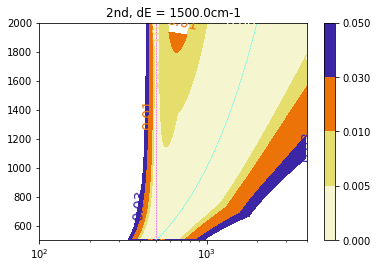

In [14]:
#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Twtarr, arr2, levels=[0.0, 0.005,0.01,0.03,0.05],cmap="CMRmap_r")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
#plt.axhline(1000)
plt.plot(Twtarr,Twtarr,color="cyan",lw=0.5, ls="dashed")
plt.title("2nd, dE = "+str(dE_2nd)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

In [19]:
500/160.

3.125

In [4]:
L=15
dEarr = np.linspace(100,1500,L)
dEarr

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1500.])

In [7]:
import numpy as np
import tqdm
from exojax.spec.lbderror import single_tilde_line_strength_zeroth
from exojax.spec.lbderror import worst_tilde_line_strength_first
from exojax.spec.lbderror import worst_tilde_line_strength_second

N=30
Twtarr = np.logspace(np.log10(100.1),np.log10(2000.1),N)
Trefarr = np.logspace(np.log10(100.1),np.log10(2000.1),N)
M=100
Tarr = np.logspace(np.log10(100.), np.log10(3000.), M)
L=15
dEarr = np.linspace(100,1500,L)

dE_0th=500.
dE_1st=1000.
dE_2nd=1500.

arr=np.zeros((M,N,N,L,3))

for idE, dE in tqdm.tqdm(enumerate(dEarr)):
    for iTref, Tref in enumerate(Trefarr):
        print(iTref,"/",N)
        for iTwt, Twt in enumerate(Twtarr):
            x = single_tilde_line_strength_zeroth(1./Tarr, 1.0/Twt, 1.0/Tref, dE_0th)
            arr[:,iTwt,iTref,idE,0]=x
            x = worst_tilde_line_strength_first(Tarr, Twt, Tref, dE_1st)
            arr[:,iTwt,iTref,idE,1]=x
            x = worst_tilde_line_strength_second(Tarr, Twt, Tref, dE_2nd)
            arr[:,iTwt,iTref,idE,2]=x

np.savez("elower_grid_arr.npz",arr,Tarr,Twtarr,Trefarr,dEarr)

0it [00:00, ?it/s]

0 / 30
1 / 30
2 / 30
3 / 30
4 / 30
5 / 30


0it [00:50, ?it/s]


KeyboardInterrupt: 